In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
set_mean = 10
indata = pd.read_csv('../data/hallem2006_TableS1_source.csv', index_col=0, header=0, encoding='utf-8')
normed = indata.T - indata.T.min()
normed = set_mean * normed/normed.mean()
normed.drop(['spontaneous firing rate'], axis=1, inplace=True)
normed

Odorant,ammonium hydroxide,putrescine,cadaverine,g-butyrolactone,g-hexalactone,g-octalactone,g-decalactone,d-decalactone,methanoic acid,acetic acid,...,ethyl methanoate,methyl hexanoate,ethyl hexanoate,hexyl hexanoate,methyl octanoate,ethyl octanoate,ethyl decanoate,ethyl trans-2-butenoate,ethyl lactate,diethyl succinate
2a,9.070866,12.568579,10.130653,6.461538,7.723480,6.796875,10.039841,10.656371,7.632509,9.689441,...,8.290155,8.558692,9.072753,8.398385,6.652977,8.352668,12.345679,5.153734,8.553191,8.753799
7a,0.000000,0.000000,0.000000,14.153846,0.000000,0.000000,4.780876,3.706564,2.544170,3.726708,...,51.813472,8.677563,3.081312,6.783311,4.681725,3.897912,3.950617,3.631040,7.531915,2.188450
9a,20.031496,18.553616,14.954774,20.000000,22.455304,11.250000,10.039841,9.729730,14.416961,11.180124,...,16.994819,10.222883,8.730385,7.106326,7.392197,8.909513,10.864198,15.929722,13.148936,9.969605
10a,11.716535,2.992519,5.788945,1.846154,8.152563,9.375000,9.561753,5.559846,21.625442,14.534161,...,8.290155,5.943536,2.910128,7.752355,3.203285,0.000000,31.111111,20.966325,7.531915,1.702128
19a,8.314961,8.079800,8.683417,1.538462,5.292014,5.625000,0.000000,0.000000,8.480565,8.944099,...,0.000000,8.202080,12.496434,0.000000,6.406571,3.341067,1.481481,4.919473,6.638298,10.699088
22a,12.850394,14.364090,13.025126,16.923077,25.601907,14.765625,18.167331,15.752896,22.473498,19.751553,...,12.435233,34.353640,43.651926,18.088829,64.804928,60.696056,12.839506,28.462665,12.510638,54.711246
23a,7.181102,10.174564,8.201005,4.923077,7.294398,5.859375,9.083665,9.729730,5.088339,7.453416,...,4.974093,4.992571,7.532097,6.783311,5.667351,5.568445,9.382716,4.919473,4.978723,11.185410
33b,4.535433,9.576060,8.201005,5.846154,9.153754,7.500000,18.645418,17.606178,5.936396,7.080745,...,7.046632,2.020802,5.306705,8.398385,7.145791,5.568445,10.370370,3.396779,3.829787,2.917933
35a,9.448819,10.773067,12.783920,28.615385,30.035757,13.593750,9.083665,6.023166,10.600707,7.453416,...,2.487047,2.734027,1.711840,48.775236,8.870637,1.113689,4.938272,5.505124,4.212766,0.000000
43a,7.559055,5.685786,7.477387,0.000000,6.722288,3.984375,1.912351,3.243243,4.664311,7.826087,...,1.243523,4.279346,6.333809,3.553163,3.203285,1.113689,5.925926,1.288433,4.468085,2.917933


# Distribution of elements
Looks exponential, but there are correlations between odors, I'm sure, because dot products below do not, at all, follow the distribution of dot products between vectors made of iid exponential elements. 

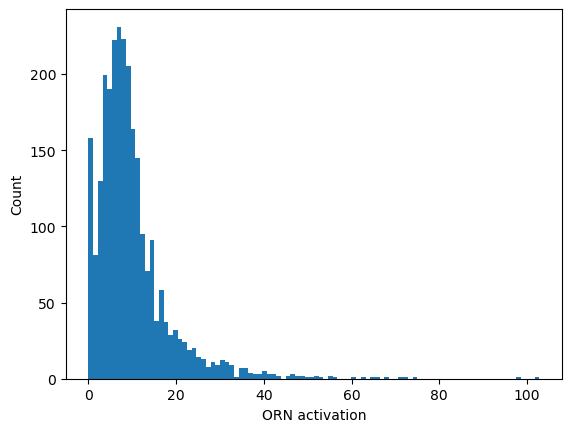

In [3]:
fig, ax = plt.subplots()
ax.hist(normed.values.flatten(), bins="fd")
ax.set(xlabel="ORN activation", ylabel="Count")
plt.show()
plt.close()

# Study dot products

In [4]:
unitnormed = normed / np.sqrt((normed**2).sum(axis=0))
dot_products = unitnormed.T.dot(unitnormed)

In [5]:
dot_products_stats = dot_products.values[np.triu_indices(n=dot_products.shape[0], k=1)]

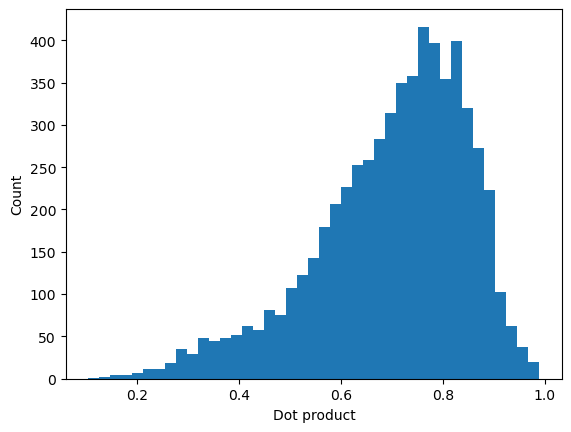

In [6]:
fig, ax = plt.subplots()
ax.hist(dot_products_stats, bins="fd")
ax.set(xlabel="Dot product", ylabel="Count")
plt.show()
plt.close()

# Conclusion: odors are not typically orthogonal! 
This is a big problem for the inhibition problem I have been considering, because the more orthogonal odors are, the better it works. 

The reason is the non-negativity of those vectors. Random non-negative vectors won't be orthogonal on average. And real odors tend to have similarity due to chemical similarities, so it's even worse here. 

Maybe by combining odors with Gautam's model, we can circumvent that problem, but for now, it's a serious issue. 

# Check random non-negative vectors
Uniformly random, then exponential random. 

In [7]:
rgen = np.random.default_rng(seed=0x5296381dd940500416b73afc46718ddf)

In [8]:
n_dims, n_odors = normed.shape
random_uniform_nn_vectors = rgen.random(size=(n_dims, n_odors))
random_uniform_nn_vectors /= np.sqrt(np.sum(random_uniform_nn_vectors**2, axis=0, keepdims=True))
dot_products_uniform = random_uniform_nn_vectors.T.dot(random_uniform_nn_vectors)
dot_products_uniform_stats = dot_products_uniform[np.triu_indices(n=n_odors, k=1)]

In [9]:
random_expo_nn_vectors = rgen.exponential(size=(n_dims, n_odors))
random_expo_nn_vectors /= np.sqrt(np.sum(random_expo_nn_vectors**2, axis=0, keepdims=True))
dot_products_expo = random_expo_nn_vectors.T.dot(random_expo_nn_vectors)
dot_products_expo_stats = dot_products_expo[np.triu_indices(n=n_odors, k=1)]

In [10]:
# Log-normal: depends a lot on the sigma parameter. 
# Small sigma: all vectors look alike, dot products are close to 1
# Large sigma: each vector has a few large components from the long tail, dot products are close to 0
#random_lognorm_nn_vectors = rgen.lognormal(sigma=1.0, size=(n_dims, n_odors))
#random_lognorm_nn_vectors /= np.sqrt(np.sum(random_lognorm_nn_vectors**2, axis=0, keepdims=True))
#dot_products_lognorm = random_lognorm_nn_vectors.T.dot(random_lognorm_nn_vectors)
#dot_products_lognorm_stats = dot_products_lognorm[np.triu_indices(n=n_odors, k=1)]

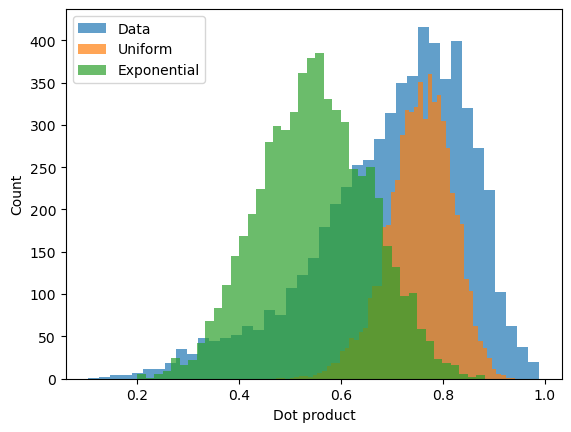

In [11]:
fig, ax = plt.subplots()
ax.hist(dot_products_stats, bins="fd", label="Data", alpha=0.7)
ax.hist(dot_products_uniform_stats, bins="fd", label="Uniform", alpha=0.7)
ax.hist(dot_products_expo_stats, bins="fd", label="Exponential", alpha=0.7)
#ax.hist(dot_products_lognorm_stats, bins="fd", label="Log-normal", alpha=0.7)
ax.set(xlabel="Dot product", ylabel="Count")
ax.legend()
plt.show()
plt.close()